# TM03 POS Tagging

## Install NLTK POS Tagger 

In [23]:
# !pip install nltk
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import word_tokenize


[nltk_data] Downloading package punkt to /Users/jirlong/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/jirlong/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


### Test

In [24]:
text = "The dog eats the big hotdog."
tokens = word_tokenize(text)
print(nltk.pos_tag(tokens))


[('The', 'DT'), ('dog', 'NN'), ('eats', 'VBZ'), ('the', 'DT'), ('big', 'JJ'), ('hotdog', 'NN'), ('.', '.')]


In [25]:
print(nltk.pos_tag(word_tokenize("The book is written by my father.")))

[('The', 'DT'), ('book', 'NN'), ('is', 'VBZ'), ('written', 'VBN'), ('by', 'IN'), ('my', 'PRP$'), ('father', 'NN'), ('.', '.')]


In [26]:
print(nltk.pos_tag(word_tokenize("My father has written more than ten books.")))

[('My', 'PRP$'), ('father', 'NN'), ('has', 'VBZ'), ('written', 'VBN'), ('more', 'JJR'), ('than', 'IN'), ('ten', 'JJ'), ('books', 'NNS'), ('.', '.')]


### Full list of the Penn POS tags

https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html
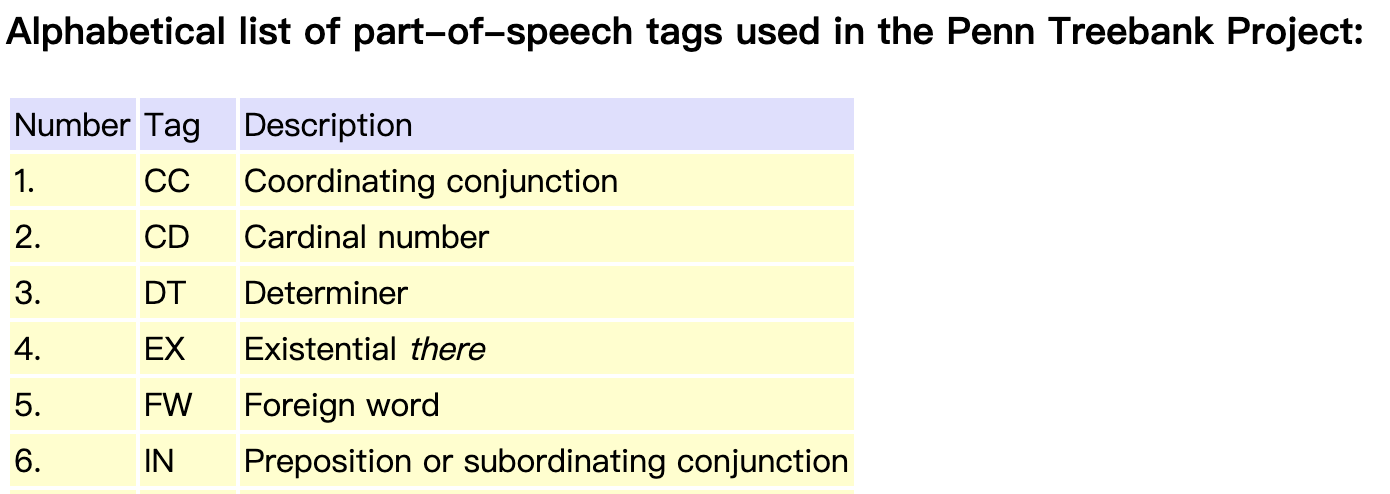

## Perform POS tagging for all tokens in the corpus. 

In [27]:
with open("data/corpus02.txt", encoding="utf8") as fin:
    text = fin.read()
print("Number of characters: %d" % len(text))

Number of characters: 75346


In [28]:
tokens = word_tokenize(text)
tokens_with_tag = nltk.pos_tag(tokens)

### Find the most frequent nouns

In [29]:
from collections import Counter

noun_counts = Counter()
for word, tag in tokens_with_tag:
    if tag == 'NN':
        noun_counts[word] += 1

for k, v in noun_counts.most_common(20):
    print(k, '\t', v)

class 	 104
bourgeoisie 	 89
society 	 72
bourgeois 	 69
proletariat 	 62
property 	 55
production 	 52
labor 	 30
existence 	 30
development 	 28
industry 	 27
capital 	 22
form 	 21
movement 	 19
struggle 	 17
character 	 17
country 	 15
abolition 	 15
time 	 14
man 	 14


### Convert words into lower case, excepting proper nouns.

In [30]:
from collections import Counter
noun_counts = Counter()
for word, tag in tokens_with_tag:
    if tag == 'NN':
        noun_counts[word.lower()] += 1
        
print(noun_counts.most_common(20))

[('class', 104), ('bourgeoisie', 89), ('society', 73), ('bourgeois', 69), ('proletariat', 62), ('property', 56), ('production', 52), ('labor', 30), ('existence', 30), ('development', 28), ('industry', 27), ('capital', 24), ('form', 21), ('abolition', 20), ('movement', 19), ('struggle', 17), ('character', 17), ('country', 15), ('time', 14), ('man', 14)]


Explore other kinds of part of speech tags

In [31]:
from collections import Counter
noun_counts = Counter()
for word, tag in tokens_with_tag:
    if tag == 'VB':
        noun_counts[word.lower()] += 1
        
print(noun_counts.most_common(20))

[('be', 41), ('have', 8), ('do', 8), ('introduce', 5), ('increase', 5), ('lose', 5), ('thus', 4), ('attain', 4), ('let', 4), ('bring', 3), ('become', 3), ('use', 3), ('form', 3), ('abolish', 3), ('acquire', 3), ('vanish', 3), ('take', 3), ('pass', 2), ('work', 2), ('say', 2)]


In [32]:
from collections import Counter
noun_counts = Counter()
for word, tag in tokens_with_tag:
    if tag == 'NNP' or tag == 'NNPS':
        noun_counts[word] += 1
        
print(noun_counts.most_common(20))

[('Communists', 23), ('Socialism', 21), ('Germany', 13), ('Communism', 12), ('France', 12), ('State', 11), ('England', 9), ('Communist', 7), ('Socialist', 6), ('America', 5), ('_i.e._', 5), ('AND', 4), ('THE', 3), ('II', 3), ('I.', 3), ('Modern', 3), ('Hence', 3), ('Communistic', 3), ('Bourgeois', 3), ('SOCIALISM', 3)]


In [33]:
from collections import Counter
noun_counts = Counter()
for word, tag in tokens_with_tag:
    if tag[0] == 'V':
        noun_counts[word.lower()] += 1
        
print(noun_counts.most_common(20))

[('is', 138), ('has', 68), ('are', 59), ('have', 45), ('be', 41), ('was', 29), ('been', 18), ('do', 18), ('existing', 15), ('were', 14), ('had', 12), ('being', 11), ('working', 10), ('become', 9), ('does', 9), ('made', 8), ('developed', 7), ('see', 7), ('becomes', 7), ('created', 7)]


## With lemmatization for better handle different forms of verbs.

- GOAL - 在計算出現次數前，先用`lemmatize()`將動詞或名詞恢復成原型
- METHOD - Load WordNet Lemmatizer provided by NTLK
- EXAMPLE
    - 'is', 'are', 'were' -> 'be' 
    - 'has', 'have' -> 'have'


In [34]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

In [35]:
import nltk
# nltk.download('wordnet')
# nltk.download('omw-1.4')
from collections import Counter
noun_counts = Counter()
for word, tag in tokens_with_tag:
    if tag[0] == 'V':
        noun_counts[wordnet_lemmatizer.lemmatize(word.lower(), 'v')] += 1
        # ADJ (a), ADJ_SAT (s), ADV (r), NOUN (n) or VERB (v)

print(noun_counts.most_common(20))

[('be', 310), ('have', 128), ('do', 31), ('become', 21), ('exist', 20), ('take', 17), ('work', 14), ('develop', 13), ('create', 13), ('make', 13), ('see', 12), ('find', 11), ('lose', 10), ('give', 9), ('increase', 9), ('destroy', 9), ('go', 9), ('abolish', 9), ('carry', 8), ('compel', 8)]


In [36]:
from collections import Counter
noun_counts = Counter()
for word, tag in tokens_with_tag:
    if tag[0] == 'N':
        noun_counts[wordnet_lemmatizer.lemmatize(word.lower(), 'n')] += 1
        # ADJ (a), ADJ_SAT (s), ADV (r), NOUN (n) or VERB (v)

print(noun_counts.most_common(20))

[('class', 124), ('bourgeoisie', 91), ('society', 76), ('bourgeois', 75), ('proletariat', 64), ('condition', 59), ('property', 56), ('production', 53), ('industry', 35), ('communist', 34), ('relation', 32), ('mean', 30), ('labor', 30), ('existence', 30), ('form', 28), ('development', 28), ('country', 28), ('socialism', 28), ('capital', 24), ('state', 24)]


In [37]:
from collections import Counter
noun_counts = Counter()
for word, tag in tokens_with_tag:
    if tag[0] == 'R':
        noun_counts[word.lower()] += 1
        # ADJ (a), ADJ_SAT (s), ADV (r), NOUN (n) or VERB (v)

print(noun_counts.most_common(20))

[('not', 55), ('more', 32), ('only', 29), ('so', 27), ('up', 25), ('therefore', 21), ('most', 17), ('away', 13), ('also', 13), ('longer', 12), ('then', 11), ('no', 10), ('even', 10), ('now', 9), ('everywhere', 9), ('generally', 9), ('ever', 9), ('just', 9), ('out', 9), ('already', 8)]


In [38]:
from collections import Counter
noun_counts = Counter()
for word, tag in tokens_with_tag:
    if tag[0] == 'R':
        noun_counts[wordnet_lemmatizer.lemmatize(word.lower(), 'r')] += 1
        # ADJ (a), ADJ_SAT (s), ADV (r), NOUN (n) or VERB (v)

print(noun_counts.most_common(20))

[('not', 55), ('more', 32), ('only', 29), ('so', 27), ('up', 25), ('therefore', 21), ('most', 17), ('away', 13), ('also', 13), ('longer', 12), ('far', 11), ('then', 11), ('no', 10), ('even', 10), ('now', 9), ('everywhere', 9), ('generally', 9), ('ever', 9), ('just', 9), ('out', 9)]


## Mining Specific Distant Collocations

Back to last week

In [39]:
window_size = 9

word_pair_counts = Counter()
word_pair_distance_counts = Counter()
for i in range(len(tokens) - 1):
    for distance in range(1, window_size):
        if i + distance < len(tokens):
            w1 = tokens[i]
            w2 = tokens[i + distance]
            word_pair_distance_counts[(w1, w2, distance)] += 1
            word_pair_counts[(w1, w2)] += 1

for (w1, w2, distance), c in word_pair_distance_counts.most_common(20):
    print("%s\t%s\t%d\t%d" % (w1, w2, distance, c))

the	of	2	279
of	the	1	242
the	the	3	154
,	the	2	118
,	and	1	111
,	,	2	109
the	of	3	105
the	,	5	101
.	The	1	100
,	,	7	98
,	,	4	97
of	,	3	97
the	the	7	95
the	,	8	94
the	the	6	92
,	,	6	92
the	the	4	92
,	the	4	92
of	,	2	91
the	,	2	91


### Detect all verb-noun collocations

In [40]:
window_size = 9

word_pair_counts = Counter()
word_pair_distance_counts = Counter()
for i in range(len(tokens_with_tag) - 1):
    w1, t1 = tokens_with_tag[i]
    if t1[0] != 'V':
        continue
    w1 = wordnet_lemmatizer.lemmatize(w1.lower(), 'v')
        
    for distance in range(1, window_size):
        if i + distance < len(tokens_with_tag):
            w2, t2 = tokens_with_tag[i + distance]
            if t2[0] == 'N':
                w2 = wordnet_lemmatizer.lemmatize(w2.lower(), 'n')
                word_pair_distance_counts[(w1, w2, distance)] += 1
                word_pair_counts[(w1, w2)] += 1

for (w1, w2, distance), c in word_pair_distance_counts.most_common(20):
    print("%s\t%s\t%d\t%d" % (w1, w2, distance, c))

work	class	1	10
be	class	4	6
exist	society	1	5
be	class	6	5
be	class	7	4
rule	class	1	4
be	class	3	4
be	society	5	4
work	party	2	4
be	struggle	5	3
have	society	6	3
pave	way	2	3
put	end	2	3
be	bourgeoisie	8	3
lose	character	3	3
be	bourgeois	5	3
be	hand	4	3
be	condition	6	3
fight	bourgeoisie	3	3
have	nothing	1	3


### Compute the mean distance of each verb-noun pair.

In [41]:
pair_mean_distances = Counter()

for (w1, w2, distance), c in word_pair_distance_counts.most_common():
    if word_pair_counts[(w1, w2)] > 1:
        pair_mean_distances[(w1, w2)] += distance * (c / word_pair_counts[(w1, w2)])


### Show the longest, middle, and shortest pairs. 

#### longest part

In [42]:
### longest part
for (w1, w2), distance in pair_mean_distances.most_common(20):
    print("%s\t%s\t%f\t%d" % (w1, w2, distance, word_pair_counts[(w1, w2)]))

be	case	8.000000	2
introduce	bourgeoisie	8.000000	2
be	communism	7.500000	2
have	communism	7.500000	2
do	population	7.500000	2
have	force	7.500000	2
have	master	7.500000	2
have	ruling	7.500000	2
be	interest	7.500000	2
be	order	7.500000	2
be	moment	7.500000	2
have	man	7.000000	2
have	industry	7.000000	2
see	proletariat	7.000000	2
have	dissolution	7.000000	2
be	relation	7.000000	3
be	action	7.000000	2
be	modern	7.000000	2
leave	man	7.000000	2
see	production	7.000000	2


#### Middle part

In [43]:
### Middle part
num_pairs = len(pair_mean_distances)
mid = num_pairs // 2
for (w1, w2), distance in pair_mean_distances.most_common()[mid-20:mid+20]:
    print("%s\t%s\t%f\t%d" % (w1, w2, distance, word_pair_counts[(w1, w2)]))

be	mean	5.333333	6
have	feudal	5.333333	3
have	character	5.333333	3
be	laborer	5.333333	3
be	property	5.333333	9
be	capitalist	5.333333	3
be	class	5.238095	21
be	capital	5.166667	6
be	struggle	5.166667	6
be	condition	5.100000	10
be	hand	5.000000	4
have	part	5.000000	2
compel	proletariat	5.000000	2
be	time	5.000000	5
do	property	5.000000	5
be	advance	5.000000	2
have	population	5.000000	3
have	dependent	5.000000	2
be	way	5.000000	3
be	slave	5.000000	2
see	antagonism	5.000000	2
be	bare	5.000000	2
be	idea	5.000000	4
abolish	property	5.000000	3
create	property	5.000000	2
convert	property	5.000000	2
keep	laborer	5.000000	2
increase	labor	5.000000	2
be	family	5.000000	2
exist	bourgeoisie	5.000000	2
replace	education	5.000000	2
do	history	5.000000	2
deaden	class	5.000000	2
be	man	4.750000	4
have	mean	4.750000	4
be	character	4.750000	4
have	hand	4.600000	5
be	party	4.500000	2
create	force	4.500000	2
abolish	appropriation	4.500000	2


#### Shortest part

In [44]:
### Shortest part
for (w1, w2), distance in pair_mean_distances.most_common()[-20:]:
    print("%s\t%s\t%f\t%d" % (w1, w2, distance, word_pair_counts[(w1, w2)]))

be	asunder	2.000000	2
supply	proletariat	2.000000	2
be	name	2.000000	2
have	meaning	2.000000	2
keep	pace	2.000000	2
stand	face	2.000000	2
continue	existence	2.000000	2
exist	property	2.000000	2
go	hand	2.000000	2
appropriate	product	1.600000	5
take	place	1.500000	2
increase	capital	1.500000	2
have	individuality	1.500000	2
create	condition	1.500000	2
exist	society	1.333333	6
rule	class	1.000000	4
rise	bourgeoisie	1.000000	2
bourgeois	society	1.000000	2
introduce	community	1.000000	2
lose	sight	1.000000	2


## Find out the meaningful verb/noun pairs with deviation.
`pair_deviations.most_common()[-20:]` to filter in low deviation part

In [45]:
pair_deviations = Counter()
for (w1, w2, distance), c in word_pair_distance_counts.most_common():
    if word_pair_counts[(w1, w2)] > 1:
        pair_deviations[(w1, w2)] += c * ((distance - pair_mean_distances[(w1, w2)]) ** 2)
    
for (w1, w2), dev_tmp in pair_deviations.most_common():
    s_2 = dev_tmp / (word_pair_counts[(w1, w2)] - 1)
    pair_deviations[(w1, w2)] = s_2 ** 0.5
    
for (w1, w2), dev in pair_deviations.most_common()[-20:]:
    print("%s\t%s\t%f\t%f\t%d" % (w1, w2, pair_mean_distances[(w1, w2)], dev, word_pair_counts[(w1, w2)]))

compel	proletariat	5.000000	0.000000	2
see	proletariat	7.000000	0.000000	2
supply	proletariat	2.000000	0.000000	2
have	dissolution	7.000000	0.000000	2
be	name	2.000000	0.000000	2
be	antagonism	4.000000	0.000000	2
base	antagonism	3.000000	0.000000	2
transform	property	3.000000	0.000000	2
dominate	society	6.000000	0.000000	2
have	meaning	2.000000	0.000000	2
determine	condition	4.000000	0.000000	2
admit	case	3.000000	0.000000	2
be	case	8.000000	0.000000	2
introduce	community	1.000000	0.000000	2
introduce	woman	3.000000	0.000000	2
introduce	bourgeoisie	8.000000	0.000000	2
keep	pace	2.000000	0.000000	2
organize	class	4.000000	0.000000	2
lose	sight	1.000000	0.000000	2
be	action	7.000000	0.000000	2


### Filter out the stopwords.
`pair_deviations.most_common()[-20:]` to filter in low deviation part

In [46]:
from nltk.corpus import stopwords
stopword_list = stopwords.words('english')

pair_deviations = Counter()
for (w1, w2, distance), c in word_pair_distance_counts.most_common():
    if w1 in stopword_list:
        continue
    if word_pair_counts[(w1, w2)] > 1:
        pair_deviations[(w1, w2)] += c * ((distance - pair_mean_distances[(w1, w2)]) ** 2)
    
for (w1, w2), dev_tmp in pair_deviations.most_common():
    s_2 = dev_tmp / (word_pair_counts[(w1, w2)] - 1)
    pair_deviations[(w1, w2)] = s_2 ** 0.5
    
for (w1, w2), dev in pair_deviations.most_common()[-20:]:
    print("%s\t%s\t%f\t%f\t%d" % (w1, w2, pair_mean_distances[(w1, w2)], dev, word_pair_counts[(w1, w2)]))

pave	way	2.000000	0.000000	3
put	end	2.000000	0.000000	3
lose	character	3.000000	0.000000	3
rise	bourgeoisie	1.000000	0.000000	2
get	hand	3.000000	0.000000	2
bourgeois	society	1.000000	0.000000	2
compel	proletariat	5.000000	0.000000	2
see	proletariat	7.000000	0.000000	2
supply	proletariat	2.000000	0.000000	2
base	antagonism	3.000000	0.000000	2
transform	property	3.000000	0.000000	2
dominate	society	6.000000	0.000000	2
determine	condition	4.000000	0.000000	2
admit	case	3.000000	0.000000	2
introduce	community	1.000000	0.000000	2
introduce	woman	3.000000	0.000000	2
introduce	bourgeoisie	8.000000	0.000000	2
keep	pace	2.000000	0.000000	2
organize	class	4.000000	0.000000	2
lose	sight	1.000000	0.000000	2


#### Filtered by Deviation: Further filter out the low frequent pairs

In [47]:
pair_deviations = Counter()
for (w1, w2, distance), c in word_pair_distance_counts.most_common():
    if w1 in stopword_list:
        continue
    if word_pair_counts[(w1, w2)] > 2:
        pair_deviations[(w1, w2)] += c * ((distance - pair_mean_distances[(w1, w2)]) ** 2)
    
for (w1, w2), dev_tmp in pair_deviations.most_common():
    s_2 = dev_tmp / (word_pair_counts[(w1, w2)] - 1)
    pair_deviations[(w1, w2)] = s_2 ** 0.5
    
for (w1, w2), dev in pair_deviations.most_common()[-20:]:
    print("%s\t%s\t%f\t%f\t%d" % (w1, w2, pair_mean_distances[(w1, w2)], dev, word_pair_counts[(w1, w2)]))

find	work	2.666667	2.886751	3
abolish	property	5.000000	2.645751	3
join	class	5.666667	2.516611	3
fight	bourgeoisie	3.800000	2.387467	5
work	class	2.000000	2.374103	12
represent	interest	3.666667	2.081666	3
mean	bourgeois	4.333333	2.081666	3
exist	thing	4.000000	1.732051	3
revolutionize	production	3.333333	1.154701	3
intend	property	6.666667	1.154701	3
concentrate	hand	3.666667	1.154701	3
attain	end	3.000000	1.000000	3
exist	society	1.333333	0.816497	6
produce	product	3.500000	0.577350	4
appropriate	product	1.600000	0.547723	5
rule	class	1.000000	0.000000	4
work	party	2.000000	0.000000	4
pave	way	2.000000	0.000000	3
put	end	2.000000	0.000000	3
lose	character	3.000000	0.000000	3


### General method for distant collocation mining. 

In [48]:
# A handy lemmatizer 
# WordNet Style: ADJ (a), ADJ_SAT (s), ADV (r), NOUN (n) or VERB (v)
# Penn Style: ADJ (J*), ADJ_SAT (J*), ADV (R*), NOUN (N*), or VERB (V*) 
def lemmatize_verbose(word, pos):
    if pos[0] == 'J':
        return wordnet_lemmatizer.lemmatize(word, 'a')
    elif pos[0] == 'R':
        return wordnet_lemmatizer.lemmatize(word, 'r')
    elif pos[0] == 'N':
        return wordnet_lemmatizer.lemmatize(word, 'n')
    elif pos[0] == 'V':
        return wordnet_lemmatizer.lemmatize(word, 'v')
    else:
        return word
    

def lemmatize_shorter(word, pos):
    if pos[0] == 'J':
        pos = 'a'
    elif pos[0] == 'R':
        pos = 'r'
    elif pos[0] == 'N':
        pos = 'n'
    elif pos[0] == 'V':
        pos = 'v'
    else:
        return word
    return wordnet_lemmatizer.lemmatize(word, pos)


def lemmatize_smarter(word, pos):
    if pos[0] in ['R', 'N', 'V']:
        pos = pos[0].lower()
    elif pos[0] == 'J':
        pos = 'a'
    else:
        return word
    return wordnet_lemmatizer.lemmatize(word, pos)


# Recommended implementation.
def lemmatize(word, pos):
    mapping = {'J': 'a', 'R': 'r', 'N': 'n', 'V': 'v'}
    if pos[0] in mapping:
        return wordnet_lemmatizer.lemmatize(word, mapping[pos[0]])
    return word


### Count all pairs.
   

In [49]:
def distant_collocations(tokens_with_tag, pos1, pos2, min_cut=2, window_size=9):
    word_pair_counts = Counter()
    word_pair_distance_counts = Counter()
    for i in range(len(tokens_with_tag) - 1):
        w1, t1 = tokens_with_tag[i]
        if not t1.startswith(pos1):
            continue
        w1 = lemmatize(w1.lower(), t1)
        for distance in range(1, window_size):
            if i + distance < len(tokens_with_tag):
                w2, t2 = tokens_with_tag[i + distance]
                if t2.startswith(pos2):
                    w2 = lemmatize(w2.lower(), t2)
                    word_pair_distance_counts[(w1, w2, distance)] += 1
                    word_pair_counts[(w1, w2)] += 1
    
    pair_mean_distances = Counter()

    for (w1, w2, distance), c in word_pair_distance_counts.most_common():
        if word_pair_counts[(w1, w2)] > 1:
            pair_mean_distances[(w1, w2)] += distance * (c / word_pair_counts[(w1, w2)])

    pair_deviations = Counter()
    for (w1, w2, distance), c in word_pair_distance_counts.most_common():
        if w1 in stopword_list:
            continue
        if word_pair_counts[(w1, w2)] > min_cut:
            pair_deviations[(w1, w2)] += c * ((distance - pair_mean_distances[(w1, w2)]) ** 2)
    
    for (w1, w2), dev_tmp in pair_deviations.most_common():
        s_2 = dev_tmp / (word_pair_counts[(w1, w2)] - 1)
        pair_deviations[(w1, w2)] = s_2 ** 0.5
    
    return pair_deviations

In [50]:
collocations = distant_collocations(tokens_with_tag, 'V', 'N')

for (w1, w2), dev in collocations.most_common()[-20:]:
    print("%s\t%s\t%f\t%f\t%d" % (w1, w2, pair_mean_distances[(w1, w2)], dev, word_pair_counts[(w1, w2)]))        


find	work	2.666667	2.886751	3
abolish	property	5.000000	2.645751	3
join	class	5.666667	2.516611	3
fight	bourgeoisie	3.800000	2.387467	5
work	class	2.000000	2.374103	12
represent	interest	3.666667	2.081666	3
mean	bourgeois	4.333333	2.081666	3
exist	thing	4.000000	1.732051	3
revolutionize	production	3.333333	1.154701	3
intend	property	6.666667	1.154701	3
concentrate	hand	3.666667	1.154701	3
attain	end	3.000000	1.000000	3
exist	society	1.333333	0.816497	6
produce	product	3.500000	0.577350	4
appropriate	product	1.600000	0.547723	5
rule	class	1.000000	0.000000	4
work	party	2.000000	0.000000	4
pave	way	2.000000	0.000000	3
put	end	2.000000	0.000000	3
lose	character	3.000000	0.000000	3


In [51]:
collocations = distant_collocations(tokens_with_tag, 'N', 'N')

for (w1, w2), dev in collocations.most_common()[-20:]:
    print("%s\t%s\t%f\t%f\t%d" % (w1, w2, pair_mean_distances[(w1, w2)], dev, word_pair_counts[(w1, w2)]))        


mode	production	0.000000	0.000000	0
socialist	communist	0.000000	0.000000	0
division	labor	0.000000	0.000000	0
community	woman	0.000000	0.000000	0
world	market	0.000000	0.000000	0
condition	life	0.000000	0.000000	0
mean	subsistence	0.000000	0.000000	0
form	society	0.000000	0.000000	0
form	property	0.000000	0.000000	0
member	society	0.000000	0.000000	0
state	thing	0.000000	0.000000	0
disappearance	class	0.000000	0.000000	0
benefit	class	0.000000	0.000000	0
relation	production	0.000000	0.000000	0
mean	communication	0.000000	0.000000	0
portion	bourgeoisie	0.000000	0.000000	0
section	class	0.000000	0.000000	0
state	society	0.000000	0.000000	0
hand	state	0.000000	0.000000	0
bourgeois	socialism	0.000000	0.000000	1


In [52]:
collocations = distant_collocations(tokens_with_tag, 'J', 'N')

for (w1, w2), dev in collocations.most_common()[-20:]:
    print("%s\t%s\t%f\t%f\t%d" % (w1, w2, pair_mean_distances[(w1, w2)], dev, word_pair_counts[(w1, w2)]))        


productive	force	0.000000	0.000000	0
middle	age	0.000000	0.000000	0
modern	bourgeois	0.000000	0.000000	0
private	property	0.000000	0.000000	0
feudal	society	0.000000	0.000000	0
middle	class	0.000000	0.000000	0
petty	bourgeois	0.000000	0.000000	0
absolute	monarchy	0.000000	0.000000	0
modern	bourgeoisie	0.000000	0.000000	0
free	trade	0.000000	0.000000	0
bourgeois	production	0.000000	0.000000	1
political	bourgeoisie	0.000000	0.000000	0
immense	majority	0.000000	0.000000	0
french	revolution	0.000000	0.000000	0
mere	production	0.000000	0.000000	0
political	supremacy	0.000000	0.000000	0
eighteenth	century	0.000000	0.000000	0
historical	development	0.000000	0.000000	0
eternal	truth	0.000000	0.000000	0
undeveloped	state	0.000000	0.000000	0


In [53]:
collocations = distant_collocations(tokens_with_tag, 'NNP', 'N')

for (w1, w2), dev in collocations.most_common()[-20:]:
    print("%s\t%s\t%f\t%f\t%d" % (w1, w2, pair_mean_distances[(w1, w2)], dev, word_pair_counts[(w1, w2)]))        


true	socialism	0.000000	3.785939	1
communist	party	0.000000	2.863564	0
communist	communist	0.000000	2.645751	0
england	france	0.000000	2.516611	0
socialist	literature	0.000000	2.500000	0
communist	literature	0.000000	2.500000	0
communism	power	0.000000	1.527525	0
germany	bourgeoisie	0.000000	0.577350	0
socialist	communist	0.000000	0.000000	0


## Implememnt a better lemmatizer for handling proper nouns (NNP / NNPS).

In [54]:
def lemmatize(word, pos):
    if not pos.startswith('NNP'):
        word = word.lower()
    mapping = {'J': 'a', 'R': 'r', 'N': 'n', 'V': 'v'}
    if pos[0] in mapping:
        return wordnet_lemmatizer.lemmatize(word, mapping[pos[0]])
    return word

### And do not lower() the word in the main function anymore. 

In [55]:
def distant_collocations(tokens_with_tag, pos1, pos2, min_cut=2, window_size=9):
    word_pair_counts = Counter()
    word_pair_distance_counts = Counter()
    for i in range(len(tokens_with_tag) - 1):
        w1, t1 = tokens_with_tag[i]
        if not t1.startswith(pos1):
            continue
        w1 = lemmatize(w1, t1)
        for distance in range(1, window_size):
            if i + distance < len(tokens_with_tag):
                w2, t2 = tokens_with_tag[i + distance]
                if t2.startswith(pos2):
                    w2 = lemmatize(w2, t2)
                    word_pair_distance_counts[(w1, w2, distance)] += 1
                    word_pair_counts[(w1, w2)] += 1
    
    pair_mean_distances = Counter()

    for (w1, w2, distance), c in word_pair_distance_counts.most_common():
        if word_pair_counts[(w1, w2)] > 1:
            pair_mean_distances[(w1, w2)] += distance * (c / word_pair_counts[(w1, w2)])

    pair_deviations = Counter()
    for (w1, w2, distance), c in word_pair_distance_counts.most_common():
        if w1 in stopword_list:
            continue
        if word_pair_counts[(w1, w2)] > min_cut:
            pair_deviations[(w1, w2)] += c * ((distance - pair_mean_distances[(w1, w2)]) ** 2)
    
    for (w1, w2), dev_tmp in pair_deviations.most_common():
        s_2 = dev_tmp / (word_pair_counts[(w1, w2)] - 1)
        pair_deviations[(w1, w2)] = s_2 ** 0.5
    
    return pair_deviations

In [56]:
collocations = distant_collocations(tokens_with_tag, 'NNP', 'N')

for (w1, w2), dev in collocations.most_common()[-20:]:
    print("%s\t%s\t%f\t%f\t%d" % (w1, w2, pair_mean_distances[(w1, w2)], dev, word_pair_counts[(w1, w2)]))        

Communist	literature	0.000000	2.886751	0
Socialist	literature	0.000000	2.886751	0
England	France	0.000000	2.516611	0
Communism	power	0.000000	1.527525	0
Communists	party	0.000000	1.154701	0
Germany	bourgeoisie	0.000000	0.577350	0
Socialist	Communist	0.000000	0.000000	0


In [58]:
collocations = distant_collocations(tokens_with_tag, 'V', 'N')

for (w1, w2), dev in collocations.most_common()[-20:]:
    print("%s\t%s\t%f\t%f\t%d" % (w1, w2, pair_mean_distances[(w1, w2)], dev, word_pair_counts[(w1, w2)]))        

find	work	2.666667	2.886751	3
abolish	property	5.000000	2.645751	3
join	class	5.666667	2.516611	3
fight	bourgeoisie	3.800000	2.387467	5
work	class	2.000000	2.374103	12
represent	interest	3.666667	2.081666	3
mean	bourgeois	4.333333	2.081666	3
exist	thing	4.000000	1.732051	3
revolutionize	production	3.333333	1.154701	3
intend	property	6.666667	1.154701	3
concentrate	hand	3.666667	1.154701	3
attain	end	3.000000	1.000000	3
exist	society	1.333333	0.816497	6
produce	product	3.500000	0.577350	4
appropriate	product	1.600000	0.547723	5
rule	class	1.000000	0.000000	4
work	party	2.000000	0.000000	4
pave	way	2.000000	0.000000	3
put	end	2.000000	0.000000	3
lose	character	3.000000	0.000000	3


## Try chatGPT

## Detecting pattern with POS

In [71]:
import re

# 偵測模式的正則表達式
pattern = r'年輕人.+越來越.+VV'

# 輸入的資料
input_data = [('現在', 'NR'), ('的', 'DEG'), ('年輕人', 'NN'), ('越來越', 'AD'), ('不', 'AD'), ('守禮教', 'VV'), ('約束', 'NN'), ('，', 'PU'), ('讓', 'VV'), ('長輩', 'NN'), ('們', 'N'), ('感到', 'VV'), ('擔憂', 'NN'), ('。', 'PU')]

# 將資料轉成字串
input_str = ''.join([word[0] + '/' + word[1] + ' ' for word in input_data])
print(input_str)


# 偵測是否符合pattern
if re.search(pattern, input_str):
    print("符合pattern")
else:
    print("不符合pattern")

現在/NR 的/DEG 年輕人/NN 越來越/AD 不/AD 守禮教/VV 約束/NN ，/PU 讓/VV 長輩/NN 們/N 感到/VV 擔憂/NN 。/PU 
符合pattern


### Detecting multiple patterns

In [76]:
import pandas as pd
import re

# 原始資料
data = [('現在年輕人實在是越來越沒有教養',), 
        ('現在不少青少年在面對未來社會時愈來愈讓人覺得沒信心',)]

# 定義正則表達式
pattern = r'(.*)(年輕人|青少年)(.*)(越來越|愈來愈)(.*)'

# 如果是括號內加上一個?:的話，代表是要偵測有這兩個字的，但沒有要把這兩個保留出來，所以偵測的結果會少這個字組
# pattern = r'(.*)(?:年輕人|青少年)(.*)(越來越|愈來愈)(.*)'

# 將資料轉換為DataFrame
df = pd.DataFrame(data, columns=['text'])

# 使用apply運算並轉換為DataFrame
df = df['text'].apply(lambda x: pd.Series(re.findall(pattern, x)[0])).rename(columns={0: 'prefix', 1: 'target1', 2: 'middle', 3:'target2', 4: 'suffix'})

# 顯示結果
print(df)


  prefix target1    middle target2   suffix
0     現在     年輕人       實在是     越來越     沒有教養
1   現在不少     青少年  在面對未來社會時     愈來愈  讓人覺得沒信心


In [77]:
from IPython.display import HTML

html_table = df.to_html()
HTML(html_table)

### With POS

In [89]:
data = [('現在/NR 的/DEG 年輕人/NN 越來越/AD 沒有/VV 教養/NN ，/PU 讓/VV 長輩/NN 們/N 感到/VV 擔憂/NN 。/PU',), 
        ('現在/NR 不少/AD 青少年/NN 在/P 面對/VV 未來/NN 社會/NN 時/NT 愈來愈/AD 讓/VD 人/NN 覺得/VV 沒/VE 信心/NN /PU',)]
df = pd.DataFrame(data, columns=['text'])

pattern = r'(.*)(年輕人|青少年)(.*)(越來越|愈來愈).*?\s+(.+?/VV)(.*)'
df = df['text'].apply(lambda x: pd.Series(re.findall(pattern, x)[0])).rename(columns={0: 'prefix', 1: 'target1', 2: 'middle', 3:'target2', 4: 'suffix'})
html_table = df.to_html()
HTML(html_table)